## **Iris**

**Benedictus Bayu Pramudhito**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
dataset = pd.read_csv('./drive/My Drive/Colab Test (Bootcamp ML 2020)/iris.csv')

dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [134]:
Y = dataset['Species'] # Target prediksi
x = dataset.drop(['Id', 'Species'], axis=1) # Data Id tidak diperlukan

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)
#data_x = pd.DataFrame(X, columns=x.columns)

In [136]:
import pickle

namafile = 'scalernew.pkl' # Nama yang digunakan bebas
pickle.dump(scaler, open(namafile, 'wb')) # Membuat file model, ganti logreg dengan nama model yang digunakan

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

In [94]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [95]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test))) # .score() -> Accuracy
print(f1_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

Accuracy of logistic regression classifier on test set: 1.00
1.0
1.0
1.0


In [96]:
filename = 'model_iris.pkl' # Nama yang digunakan bebas
pickle.dump(logreg, open(filename, 'wb')) # Membuat file model, ganti logreg dengan nama model yang digunakan

**Web Services Using Flask**

In [97]:
!pip install flask-ngrok

In [98]:
from flask_ngrok import run_with_ngrok
from flask import Flask

In [140]:
app = Flask(__name__) # Membuat sebuah object Flask

@app.route("/home")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"

In [141]:
from flask import jsonify, request

In [142]:
@app.route('/classify', methods=['POST'])
def classification():
  sepal_length = float(request.json['SepalLengthCm'])
  sepal_width = float(request.json['SepalWidthCm'])
  petal_length = float(request.json['PetalLengthCm'])
  petal_width = float(request.json['PetalWidthCm'])

  model = pickle.load(open('model_iris.pkl', 'rb'))
  scale = pickle.load(open('scalernew.pkl', 'rb'))

  data = [[sepal_length, sepal_width, petal_length, petal_width]]
  data1 = scale.transform(data)
  y_pred_loaded = model.predict(data1)

  return jsonify({
      "output": y_pred_loaded[0]
  })

In [143]:
run_with_ngrok(app)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://f38496b11764.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [06/Oct/2020 12:33:25] "POST /classify HTTP/1.1" 200 -


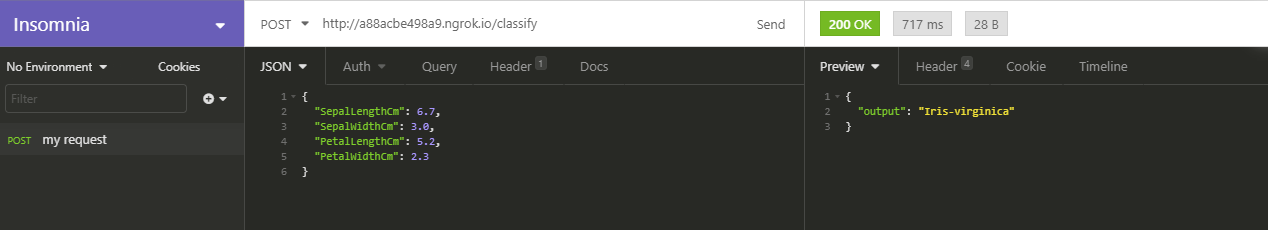